# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set_style("darkgrid")

# Load Dataset

In [2]:

file_path = "dataset.csv" 

data = pd.read_csv(file_path)

pd.set_option("display.max_columns", None)  
pd.set_option("display.width", 1000)  
pd.set_option("display.colheader_justify", "left")

data.head()



,Country,Year,Month,Day of Week,Time of Day,Urban/Rural,Road Type,Weather Conditions,Visibility Level,Number of Vehicles Involved,Speed Limit,Driver Age Group,Driver Gender,Driver Alcohol Level,Driver Fatigue,Vehicle Condition,Pedestrians Involved,Cyclists Involved,Accident Severity,Number of Injuries,Number of Fatalities,Emergency Response Time,Traffic Volume,Road Condition,Accident Cause,Insurance Claims,Medical Cost,Economic Loss,Region,Population Density
0,USA,2002,October,Tuesday,Evening,Rural,Street,Windy,220.414651,1,37,18-25,Male,0.051921,0,Poor,1,2,Moderate,8,2,58.625720,7412.752760,Wet,Weather,4,40499.856982,22072.878502,Europe,3866.273014
1,UK,2014,December,Saturday,Evening,Urban,Street,Windy,168.311358,3,96,18-25,Female,0.234893,1,Poor,1,1,Minor,6,1,58.041380,4458.628820,Snow-covered,Mechanical Failure,3,6486.600073,9534.399441,North America,2333.916224
2,USA,2012,July,Sunday,Afternoon,Urban,Highway,Snowy,341.286506,4,62,41-60,Male,0.142366,0,Moderate,0,0,Moderate,13,4,42.374452,9856.915064,Wet,Speeding,4,29164.412982,58009.145124,South America,4408.889129
3,UK,2017,May,Saturday,Evening,Urban,Main Road,Clear,489.384536,2,78,18-25,Male,0.120815,1,Good,2,0,Minor,6,3,48.554014,4958.646267,Icy,Distracted Driving,3,25797.212566,20907.151302,Australia,2810.822423
4,Canada,2002,July,Tuesday,Afternoon,Rural,Highway,Rainy,348.344850,1,98,41-60,Male,0.155842,1,Poor,0,1,Moderate,13,4,18.318250,3843.191463,Icy,Distracted Driving,8,15605.293921,13584.060759,South America,3883.645634


In [3]:
data.dtypes

Country                         object
Year                             int64
Month                           object
Day of Week                     object
Time of Day                     object
Urban/Rural                     object
Road Type                       object
Weather Conditions              object
Visibility Level               float64
Number of Vehicles Involved      int64
Speed Limit                      int64
Driver Age Group                object
Driver Gender                   object
Driver Alcohol Level           float64
Driver Fatigue                   int64
Vehicle Condition               object
Pedestrians Involved             int64
Cyclists Involved                int64
Accident Severity               object
Number of Injuries               int64
Number of Fatalities             int64
Emergency Response Time        float64
Traffic Volume                 float64
Road Condition                  object
Accident Cause                  object
Insurance Claims         

In [4]:
original_data = data.copy()  # Save before encoding

# Clean Data

In [5]:
##  CHECK FOR MISSING VALUES
data.isnull().sum()
data.duplicated().sum()
#Clean Data and remove missing values
data = data.dropna()



# Relation

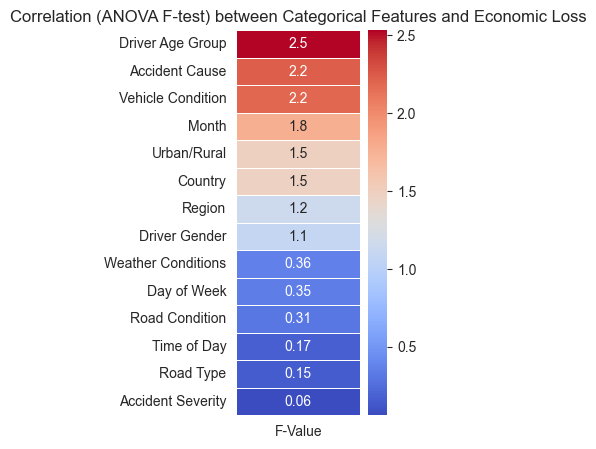

In [6]:
categorical_columns = ['Country', 'Month', 'Day of Week', 'Time of Day', 'Urban/Rural', 'Road Type', 'Weather Conditions', 'Driver Gender',
                        'Road Condition', 'Accident Cause',  'Region', 'Driver Age Group', 'Vehicle Condition', 'Accident Severity']


# Higher F-value indicates stronger correlation

def anova_f_test(df, categorical_cols, target):
    results = {}
    for col in categorical_cols:
        groups = [df[target][df[col] == category] for category in df[col].unique()]
        f_val, p_val = stats.f_oneway(*groups)
        results[col] = f_val  
    return results

correlation_dict = anova_f_test(original_data, categorical_columns, 'Economic Loss')

correlation_df = pd.DataFrame.from_dict(correlation_dict, orient='index', columns=['F-Value'])
correlation_df = correlation_df.sort_values(by='F-Value', ascending=False)


plt.figure(figsize=(2, 5))  
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation (ANOVA F-test) between Categorical Features and Economic Loss")
plt.show()



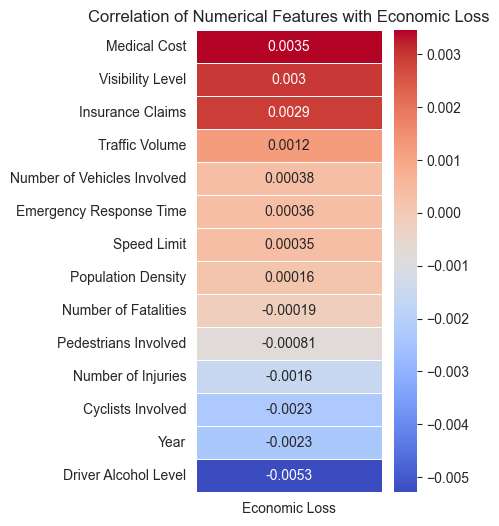

In [7]:

numerical_columns = ['Year', 'Visibility Level', 'Number of Vehicles Involved', 'Speed Limit', 
                     'Driver Alcohol Level', 'Pedestrians Involved', 'Cyclists Involved', 
                     'Number of Injuries', 'Number of Fatalities', 'Emergency Response Time', 
                     'Traffic Volume', 'Medical Cost', 'Insurance Claims', 'Population Density']

cols_to_consider = numerical_columns + ['Economic Loss']

corr_matrix = data[cols_to_consider].corr()

economic_loss_corr = corr_matrix[['Economic Loss']].drop('Economic Loss').sort_values(by='Economic Loss', ascending=False)

plt.figure(figsize=(3, 6))
sns.heatmap(economic_loss_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation of Numerical Features with Economic Loss")
plt.show()


# Feature Engineering

In [8]:
selected_cols = [
     'Economic Loss',   

    # Numerical Features
    'Medical Cost', 'Visibility Level', 'Insurance Claims', 'Traffic Volume',
    # Categorical Features (One-Hot Encoded)
    'Driver Age Group', 'Accident Cause', 'Vehicle Condition', 
    'Month', 'Urban/Rural', 'Country'
]


# Create a new DataFrame with selected columns
data_selected = data[selected_cols].copy(5000)

# Display the first few rows to verify
data_selected.head()




,Economic Loss,Medical Cost,Visibility Level,Insurance Claims,Traffic Volume,Driver Age Group,Accident Cause,Vehicle Condition,Month,Urban/Rural,Country
0,22072.878502,40499.856982,220.414651,4,7412.752760,18-25,Weather,Poor,October,Rural,USA
1,9534.399441,6486.600073,168.311358,3,4458.628820,18-25,Mechanical Failure,Poor,December,Urban,UK
2,58009.145124,29164.412982,341.286506,4,9856.915064,41-60,Speeding,Moderate,July,Urban,USA
3,20907.151302,25797.212566,489.384536,3,4958.646267,18-25,Distracted Driving,Good,May,Urban,UK
4,13584.060759,15605.293921,348.344850,8,3843.191463,41-60,Distracted Driving,Poor,July,Rural,Canada


# One Hot Encoding & Label Encoding

In [9]:

ohe_categorical_columns = ['Country', 'Month', 'Urban/Rural', 'Accident Cause']

le_categorical_columns = ['Driver Age Group', 'Vehicle Condition']

data_selected[le_categorical_columns].apply(lambda col: col.unique())


Driver Age Group     [18-25, 41-60, 26-40, <18, 61+]
Vehicle Condition             [Poor, Moderate, Good]
dtype: object

In [10]:
#Label Encoding

driver_age_mapping = {"<18": 0, "18-25": 1, "26-40": 2, "41-60": 3, "61+": 4}
vehicle_condition_mapping = {"Poor": 0, "Moderate": 1, "Good": 2}

# Apply the mappings to the DataFrame
data_selected["Driver Age Group"] = data_selected["Driver Age Group"].map(driver_age_mapping)
data_selected["Vehicle Condition"] = data_selected["Vehicle Condition"].map(vehicle_condition_mapping)

# Check the transformed data
data_selected.head()


,Economic Loss,Medical Cost,Visibility Level,Insurance Claims,Traffic Volume,Driver Age Group,Accident Cause,Vehicle Condition,Month,Urban/Rural,Country
0,22072.878502,40499.856982,220.414651,4,7412.752760,1,Weather,0,October,Rural,USA
1,9534.399441,6486.600073,168.311358,3,4458.628820,1,Mechanical Failure,0,December,Urban,UK
2,58009.145124,29164.412982,341.286506,4,9856.915064,3,Speeding,1,July,Urban,USA
3,20907.151302,25797.212566,489.384536,3,4958.646267,1,Distracted Driving,2,May,Urban,UK
4,13584.060759,15605.293921,348.344850,8,3843.191463,3,Distracted Driving,0,July,Rural,Canada


In [11]:
data_selected = pd.get_dummies(data_selected, columns=ohe_categorical_columns)

data_selected.head()


,Economic Loss,Medical Cost,Visibility Level,Insurance Claims,Traffic Volume,Driver Age Group,Vehicle Condition,Country_Australia,Country_Brazil,Country_Canada,Country_China,Country_Germany,Country_India,Country_Japan,Country_Russia,Country_UK,Country_USA,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Urban/Rural_Rural,Urban/Rural_Urban,Accident Cause_Distracted Driving,Accident Cause_Drunk Driving,Accident Cause_Mechanical Failure,Accident Cause_Speeding,Accident Cause_Weather
0,22072.878502,40499.856982,220.414651,4,7412.752760,1,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True
1,9534.399441,6486.600073,168.311358,3,4458.628820,1,0,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
2,58009.145124,29164.412982,341.286506,4,9856.915064,3,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
3,20907.151302,25797.212566,489.384536,3,4958.646267,1,2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False
4,13584.060759,15605.293921,348.344850,8,3843.191463,3,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False


# Normalization

In [12]:
#############################****************USE X NORMLAIZATIONNN



numerical_columns = [
    'Visibility Level',
    'Traffic Volume', 
    'Medical Cost', 
]


######### # Standardize each numerical column (mean=0, std=1)
mean_values = data_selected[numerical_columns].mean()
std_values = data_selected[numerical_columns].std()
data_selected[numerical_columns] = (data_selected[numerical_columns] - mean_values) / std_values


######### # Min-Max Scaling to range [0, 1]

# for col in numerical_columns:
#     min_val = data[col].min()
#     max_val = data[col].max()
#     data[col] = (data[col] - min_val) / (max_val - min_val)  # Apply Min-Max scaling

# Check the result
data_selected.head()



,Economic Loss,Medical Cost,Visibility Level,Insurance Claims,Traffic Volume,Driver Age Group,Vehicle Condition,Country_Australia,Country_Brazil,Country_Canada,Country_China,Country_Germany,Country_India,Country_Japan,Country_Russia,Country_UK,Country_USA,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Urban/Rural_Rural,Urban/Rural_Urban,Accident Cause_Distracted Driving,Accident Cause_Drunk Driving,Accident Cause_Mechanical Failure,Accident Cause_Speeding,Accident Cause_Weather
0,22072.878502,1.071919,-0.420433,4,0.828765,1,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True
1,9534.399441,-1.310834,-0.821463,3,-0.203903,1,0,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
2,58009.145124,0.277830,0.509897,4,1.683166,3,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
3,20907.151302,0.041945,1.649783,3,-0.029113,1,2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False
4,13584.060759,-0.672036,0.564224,8,-0.419041,3,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False


# Display Data

In [13]:
# # Plot histograms for each selected feature
# new_data.hist(figsize=(12, 10), bins=15, edgecolor='black')
# plt.suptitle("Feature Distributions", fontsize=16)
# plt.show()

In [14]:
# # Box Plot Display
# num_features = new_data.shape[1]  
# rows = (num_features // 4) + 1  
############### cols = 4  
# new_data.plot(kind='box', figsize=(15, 10), vert=False, subplots=True, layout=(rows, cols), sharex=False, sharey=False)
# plt.suptitle("Feature Box Plots", fontsize=16)
# plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.show()


In [15]:

# # Compute correlation matrix
# correlation_matrix = data.corr()

# # Get correlation with target variable (assuming 'Economic Loss' is the target)
# correlations = correlation_matrix['Economic Loss'].sort_values(ascending=False)

# # Plot heatmap for correlations with target variable (horizontally)
# plt.figure(figsize=(25, 2))  # Adjusted the figure size for horizontal display
# sns.heatmap(correlations.to_frame().T, annot=True, cmap="coolwarm", linewidths=0.5, 
#             cbar_kws={'label': 'Correlation'}, annot_kws={'rotation': 90})
# plt.title("Feature Correlations with Target Variable")
# plt.show()


In [16]:
## HUGE HEAT MAPPPP



# plt.figure(figsize=(20, 15))
# sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.1)
# plt.title("Correlation Matrix (NumPy)")
# plt.show()


In [17]:
##################

In [18]:

# # List of selected features to plot against the target variable ('Economic Loss')
# target_variable = 'Economic Loss'

# # Create scatter plots
# plt.figure(figsize=(12, 4 * len(selected_features)))

# for i, feature in enumerate(selected_features, 1):
#     plt.subplot(len(selected_features), 1, i)
#     sns.scatterplot(x=new_data[feature], y=new_data[target_variable], alpha=0.6)
#     plt.xlabel(feature)
#     plt.ylabel(target_variable)
#     plt.title(f"{feature} vs {target_variable}")

# plt.tight_layout()
# plt.show()


# Select features which effect Economic Loss

In [19]:
# # selected_features = [
# #     'Year', 'Number of Vehicles Involved', 'Speed Limit', 'Driver Alcohol Level', 'Driver Fatigue', 'Pedestrians Involved', 'Cyclists Involved', 'Number of Injuries',
# #     'Number of Fatalities', 'Emergency Response Time', 'Traffic Volume', 'Insurance Claims', 'Medical Cost', 'Population Density', 'Economic Loss'
# # ]


# # new_data = data[selected_features].copy()

# # # new_data = new_data.iloc[:50]

# # new_data.head()




# #################################################################


# top_features = correlations.index[:8]  

# print(correlations[top_features])

# # Select the top features for training
# new_data = data[top_features]

# # Display the selected features data
# new_data.head()



# Define X and y and set Hyper parameters

In [20]:
# Define features (X) and target variable (y)
X = data_selected.drop(columns=['Economic Loss']).values  # Convert to NumPy array
y = data_selected['Economic Loss'].values.reshape(-1, 1)  # Convert to NumPy array and reshape

# Add bias term (intercept) to X
X = np.c_[np.ones((X.shape[0], 1)), X]  # Adding a column of ones for the intercept

# Hyperparameters
learning_rate = 0.01  # Step size
epochs = 3000  # Number of iterations
m = X.shape[0]  # Number of samples

# Initialize weights (theta) randomly
theta = np.random.randn(X.shape[1], 1)



In [21]:
# THE VALUES OF X WITH ONE COL AS BIASS

columns = ['Bias'] + list(data_selected.drop(columns=['Economic Loss']).columns)  # Add column names
X_df = pd.DataFrame(X, columns=columns)
pd.set_option("display.float_format", "{:.4f}".format)  # Limit decimal places
print(X_df.head(10))  # Show first 10 rows neatly


  Bias   Medical Cost Visibility Level Insurance Claims Traffic Volume Driver Age Group Vehicle Condition Country_Australia Country_Brazil Country_Canada Country_China Country_Germany Country_India Country_Japan Country_Russia Country_UK Country_USA Month_April Month_August Month_December Month_February Month_January Month_July Month_June Month_March Month_May Month_November Month_October Month_September Urban/Rural_Rural Urban/Rural_Urban Accident Cause_Distracted Driving Accident Cause_Drunk Driving Accident Cause_Mechanical Failure Accident Cause_Speeding Accident Cause_Weather
0 1.0000  1.0719      -0.4204           4                0.8288         1                0                 False             False          False          False         False           False         False         False          False       True       False       False        False          False          False         False      False      False       False     False           True         False            Tr

In [22]:
# print(f"theta type: {theta.dtype}")
# print(f"gradients type: {gradients.dtype}")


# Training

In [23]:


# Store loss for visualization
loss_history = []

# Gradient Descent Loop
for epoch in range(epochs):
    # Compute predictions
    y_pred = np.dot(X, theta)

    # Compute error
    error = y_pred - y

    # Compute gradients
    gradients = (1/m) * np.dot(X.T, error)

    # Update weights
    theta -= learning_rate * gradients.astype(np.float64)

    # Compute and store loss (Mean Squared Error)
    mse = np.mean(error ** 2)
    loss_history.append(mse)

    # Print MSE every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: MSE = {mse}")



Epoch 0: MSE = 3361144544.42407
Epoch 100: MSE = 996876030.4587108
Epoch 200: MSE = 922348527.1054461
Epoch 300: MSE = 881841014.8921964
Epoch 400: MSE = 857452758.4310874
Epoch 500: MSE = 842311622.1468297
Epoch 600: MSE = 832827100.5716875
Epoch 700: MSE = 826870403.2604566
Epoch 800: MSE = 823126141.6839728
Epoch 900: MSE = 820771628.648372
Epoch 1000: MSE = 819290549.7090272
Epoch 1100: MSE = 818358543.7768509
Epoch 1200: MSE = 817771773.1722215
Epoch 1300: MSE = 817402121.3263527
Epoch 1400: MSE = 817169054.5111088
Epoch 1500: MSE = 817021942.6515085
Epoch 1600: MSE = 816928950.140658
Epoch 1700: MSE = 816870054.6774445
Epoch 1800: MSE = 816832660.0055063
Epoch 1900: MSE = 816808838.6293557
Epoch 2000: MSE = 816793598.8197496
Epoch 2100: MSE = 816783795.31137
Epoch 2200: MSE = 816777444.5311117
Epoch 2300: MSE = 816773294.0686086
Epoch 2400: MSE = 816770551.9444319
Epoch 2500: MSE = 816768716.3244827
Epoch 2600: MSE = 816767468.3798544
Epoch 2700: MSE = 816766604.8484757
Epoch 280

In [28]:
# Final model parameters (theta)
print("Final weights (theta):")
print(theta)

# Making predictions on the same dataset
predictions = np.dot(X, theta)

# Display first 5 predictions
print("First 5 Predictions:")
print(predictions[:5])


Final weights (theta):
[[2.66819778e+04]
 [1.00269196e+02]
 [8.37035843e+01]
 [3.12620306e+01]
 [3.48817731e+01]
 [5.98467893e-01]
 [3.88533804e+01]
 [2.21432642e+03]
 [2.95281567e+03]
 [3.02113963e+03]
 [2.93969605e+03]
 [2.65535394e+03]
 [2.62360112e+03]
 [2.35767881e+03]
 [2.52093968e+03]
 [2.96330362e+03]
 [2.43307383e+03]
 [2.43865580e+03]
 [2.02592252e+03]
 [1.99975608e+03]
 [2.50626652e+03]
 [2.64092944e+03]
 [1.93609158e+03]
 [1.99036475e+03]
 [2.77644285e+03]
 [2.56242699e+03]
 [1.84589960e+03]
 [1.90030395e+03]
 [2.05783514e+03]
 [1.32449847e+04]
 [1.34354349e+04]
 [5.29502293e+03]
 [5.66746771e+03]
 [5.13588000e+03]
 [5.05342268e+03]
 [5.53210558e+03]]
First 5 Predictions:
[[50019.290029738026]
 [50103.428854218735]
 [49834.947595192694]
 [51251.54063731729]
 [50396.33452285514]]


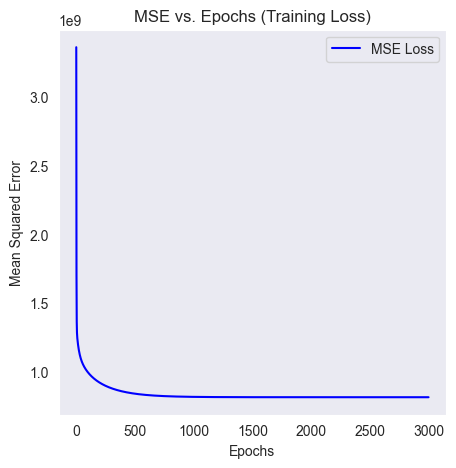

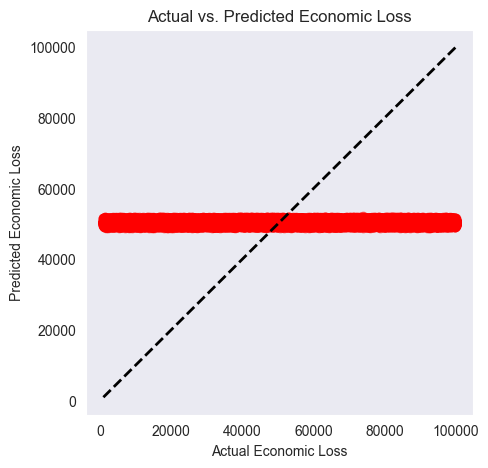

In [29]:

# Plot MSE vs. Epochs
plt.figure(figsize=(5, 5))
plt.plot(range(epochs), loss_history, label="MSE Loss", color='b')
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs. Epochs (Training Loss)")
plt.legend()
plt.grid()
plt.show()

# Scatter plot: Actual vs. Predicted Economic Loss
plt.figure(figsize=(5, 5))
plt.scatter(y, predictions, color='r', alpha=0.5)
plt.xlabel("Actual Economic Loss")
plt.ylabel("Predicted Economic Loss")
plt.title("Actual vs. Predicted Economic Loss")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Reference line
plt.grid()
plt.show()


In [26]:
# def predict_economic_loss(features):
#     """
#     Predict Economic Loss using the trained model.
    
#     :param features: List or NumPy array of feature values (excluding 'Economic Loss')
#     :return: Predicted economic loss value
#     """
#     if len(features) != X.shape[1] - 1:
#         raise ValueError(f"Expected {X.shape[1] - 1} features, but got {len(features)}")

#     features = np.array(features).reshape(1, -1)  # Convert input to NumPy array
#     features = np.c_[np.ones((features.shape[0], 1)), features]  # Add bias term
#     prediction = np.dot(features, theta)  # Compute prediction

#     return prediction[0, 0]

# # Example usage with a random test sample (replace with actual values)
# test_features = [0.098, 0.2, 0.50, 0.1, 0, 0.1, 0, 0.3, 1, 0, 0.5, 0.300, 2, 1, 0.2000, 0.500]  # Example input
# predicted_loss = predict_economic_loss(test_features)
# print(f"Predicted Economic Loss: {predicted_loss:.2f}")


In [27]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Example data (replace with your actual data)
# y_actual = np.array(y)  # Actual Economic Loss
# y_predicted = np.array(predictions)  # Predicted Economic Loss

# # Compute Least Squares for Line of Best Fit
# N = len(y_actual)
# sum_x = np.sum(y_actual)
# sum_y = np.sum(y_predicted)
# sum_xy = np.sum(y_actual * y_predicted)
# sum_x2 = np.sum(y_actual ** 2)

# # Compute slope (m) and intercept (b)
# m = (N * sum_xy - sum_x * sum_y) / (N * sum_x2 - sum_x ** 2)
# b = (sum_y - m * sum_x) / N

# # Generate fitted values for the best-fit line
# y_fit = np.linspace(y_actual.min(), y_actual.max(), 100)
# predicted_fit = m * y_fit + b  # y = mx + b

# # Plot Scatter Plot
# plt.figure(figsize=(15, 5))
# plt.scatter(y_actual, y_predicted, color='r', alpha=0.5, label="Actual vs. Predicted")

# # Plot Line of Best Fit
# plt.plot(y_fit, predicted_fit, 'b-', lw=2, label="Line of Best Fit")

# # Plot Reference Line (y = x)
# plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'k--', lw=2, label="Reference Line (y=x)")

# # Labels and title
# plt.xlabel("Actual Economic Loss")
# plt.ylabel("Predicted Economic Loss")
# plt.title("Actual vs. Predicted Economic Loss with Line of Best Fit")
# plt.legend()
# plt.grid()
# plt.show()
